In [1]:
import torch
import torch.nn as nn

torch.manual_seed(42)

**BatchNorm 1d**

In [2]:
input = torch.randint(5, (4, 3) , dtype=torch.float32)
input

tensor([[2., 2., 1.],
        [4., 1., 0.],
        [0., 4., 0.],
        [3., 3., 4.]])

In [3]:
batch_norm_layer = nn.BatchNorm1d(num_features=3)

In [4]:
batch_norm_layer.weight

Parameter containing:
tensor([1., 1., 1.], requires_grad=True)

In [5]:
batch_norm_layer.bias

Parameter containing:
tensor([0., 0., 0.], requires_grad=True)

In [6]:
output = batch_norm_layer(input)
output

tensor([[-0.1690, -0.4472, -0.1525],
        [ 1.1832, -1.3416, -0.7625],
        [-1.5213,  1.3416, -0.7625],
        [ 0.5071,  0.4472,  1.6775]], grad_fn=<NativeBatchNormBackward0>)

**step by step for BatchNorm 1d**

In [7]:
torch.mean(input, dim=0)

tensor([2.2500, 2.5000, 1.2500])

In [8]:
torch.std(input, dim=0, correction=0)

tensor([1.4790, 1.1180, 1.6394])

In [9]:
x_hat_0 = (2-2.2500)/(1.4790**2 + 1e-05)**(1/2)
x_hat_0

-0.16903274412303934

**Update Parameters**

In [10]:
inputs = torch.randint(5, (3, 32, 32), dtype=torch.float32)

In [11]:
labels = torch.tensor([0, 1, 1])

In [12]:
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(32*32, 16),
    nn.BatchNorm1d(16),
    nn.ReLU(),
    nn.Linear(16, 2)
)

In [13]:
for p in model.parameters():
  print(p)

Parameter containing:
tensor([[-0.0168, -0.0051,  0.0113,  ..., -0.0259, -0.0251, -0.0292],
        [ 0.0059, -0.0113, -0.0144,  ...,  0.0134,  0.0059, -0.0285],
        [-0.0006, -0.0293,  0.0273,  ...,  0.0293, -0.0243,  0.0291],
        ...,
        [ 0.0164, -0.0216,  0.0230,  ...,  0.0280, -0.0165, -0.0155],
        [-0.0107,  0.0036, -0.0243,  ..., -0.0079,  0.0220, -0.0008],
        [-0.0174,  0.0059, -0.0192,  ..., -0.0140, -0.0043,  0.0130]],
       requires_grad=True)
Parameter containing:
tensor([-0.0287,  0.0133,  0.0176, -0.0309,  0.0131,  0.0047,  0.0124, -0.0173,
         0.0197, -0.0180, -0.0136,  0.0101, -0.0067,  0.0218, -0.0036, -0.0244],
       requires_grad=True)
Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True)
Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True)
Parameter containing:
tensor([[-0.2083,  0.0129, -0.1948,  0.22

In [14]:
predictions = model(inputs)

In [15]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

In [16]:
loss = loss_function(predictions, labels)

In [17]:
loss.backward()

In [18]:
optimizer.step()

In [19]:
for p in model.parameters():
  print(p)

Parameter containing:
tensor([[-0.0169, -0.0052,  0.0112,  ..., -0.0260, -0.0250, -0.0291],
        [ 0.0060, -0.0112, -0.0143,  ...,  0.0135,  0.0058, -0.0286],
        [-0.0005, -0.0292,  0.0274,  ...,  0.0294, -0.0244,  0.0290],
        ...,
        [ 0.0165, -0.0217,  0.0229,  ...,  0.0279, -0.0164, -0.0154],
        [-0.0108,  0.0035, -0.0244,  ..., -0.0080,  0.0221, -0.0007],
        [-0.0175,  0.0058, -0.0193,  ..., -0.0141, -0.0042,  0.0131]],
       requires_grad=True)
Parameter containing:
tensor([-0.0287,  0.0132,  0.0176, -0.0309,  0.0131,  0.0047,  0.0124, -0.0174,
         0.0197, -0.0180, -0.0136,  0.0101, -0.0067,  0.0218, -0.0036, -0.0243],
       requires_grad=True)
Parameter containing:
tensor([1.0001, 0.9999, 1.0001, 1.0001, 1.0001, 0.9999, 0.9999, 0.9999, 0.9999,
        0.9999, 0.9999, 0.9999, 1.0001, 0.9999, 1.0001, 1.0001],
       requires_grad=True)
Parameter containing:
tensor([ 1.0000e-04, -1.0000e-04,  1.0000e-04,  1.0000e-04,  9.9997e-05,
        -1.0000e-0

**MNIST Classification**

In [20]:
!pip install torch-summary

In [55]:
import os
import time

import torch
from torch import nn
import torch.optim as optim
from torchvision import datasets
from torchvision import transforms
import torch.utils.data as data
from torch.utils.data import DataLoader

from torchsummary import summary

In [56]:
seed = 1
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True

**Load dataset**

In [57]:
root = "./data"

train_data = datasets.MNIST(
    root=root,
    train=True,
    download=True
)

test_data = datasets.MNIST(
    root=root,
    train=True,
    download=True
)

**Preprocessing**

In [ ]:
VALID_RATIO = 0.9  # 90% for training and 10% for testing

n_train_examples = int(len(train_data) * VALID_RATIO)
n_valid_examples = len(train_data) - n_train_examples

In [59]:
train_data, valid_data = data.random_split(
    train_data,
    [n_train_examples, n_valid_examples]
)

In [60]:
# compute mean and std
mean = train_data.dataset.data.float().mean() / 255
std = train_data.dataset.data.float().std() / 255
mean, std

(tensor(0.1307), tensor(0.3081))

In [ ]:
train_transforms = transforms.Compose([
    transforms.ToTensor(),                       # Convert numpy arrays into tensors
    transforms.Normalize(mean=[mean], std=[std])
])

test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[mean], std=[std])
])

In [63]:
train_data.dataset.transform = train_transforms
valid_data.dataset.transform = test_transforms
test_data.transform = test_transforms

In [64]:
BATCH_SIZE = 256

train_dataloader = data.DataLoader(
    train_data,
    shuffle=True,
    batch_size=BATCH_SIZE
)

valid_dataloader = data.DataLoader(
    valid_data,
    batch_size=BATCH_SIZE
)

test_dataloader = data.DataLoader(
    test_data,
    batch_size = BATCH_SIZE
)

**Train Model**

In [65]:
def train_epoch(model, optimizer, criterion, train_dataloader, device, epoch=0, log_interval=50):
  model.train()
  total_acc, total_count = 0, 0
  losses=[]
  start_time = time.time()

  for idx, (inputs, labels) in enumerate(train_dataloader):
    inputs = inputs.to(device)
    labels = labels.to(device)

    optimizer.zero_grad()

    predictions = model(inputs)

    # compute loss
    loss = criterion(predictions, labels)
    losses.append(loss.item())

    # backward
    loss.backward()
    optimizer.step()
    total_acc += (predictions.argmax(1) == labels).sum().item()
    total_count += labels.size(0)
    if idx % log_interval == 0 and idx > 0:
      elaped = time.time() - start_time
      print(
          "| epoch {:3d} | {:5d}/{:5d} batches "
          "| accuracy {:8.3f}".format(
              epoch, idx, len(train_dataloader), total_acc / total_count
          )
      )
      total_acc, total_count = 0, 0
      start_time = time.time()

  epoch_acc = total_acc / total_count
  epoch_loss = sum(losses)/len(losses)
  return epoch_acc, epoch_loss

In [66]:
def evaluate_epoch(model, criterion, valid_dataloader):
    model.eval()
    total_acc, total_count = 0, 0
    losses = []

    with torch.no_grad():
        for idx, (inputs, labels) in enumerate(valid_dataloader):
            inputs = inputs.to(device)
            labels = labels.to(device)

            predictions = model(inputs)

            loss = criterion(predictions, labels)
            losses.append(loss.item())

            total_acc += (predictions.argmax(1) == labels).sum().item()
            total_count += labels.size(0)

    epoch_acc = total_acc / total_count
    epoch_loss = sum(losses) / len(losses)
    return epoch_acc, epoch_loss


In [67]:
def train(model, model_name, optimizer, criterion, train_dataloader, valid_dataloader, num_epochs, device):
    train_accs, train_losses = [], []
    eval_accs, eval_losses = [], []
    best_loss_eval = 100
    times = []
    for epoch in range(1, num_epochs+1):
        epoch_start_time = time.time()
        # Training
        train_acc, train_loss = train_epoch(model, optimizer, criterion, train_dataloader, device, epoch)
        train_accs.append(train_acc)
        train_losses.append(train_loss)

        # Evaluation
        eval_acc, eval_loss = evaluate_epoch(model, criterion, valid_dataloader)
        eval_accs.append(eval_acc)
        eval_losses.append(eval_loss)

        # Save best model
        if eval_loss < best_loss_eval:
            torch.save(model.state_dict(), save_model + f'/{model_name}.pt')

        times.append(time.time() - epoch_start_time)
        # Print loss, acc end epoch
        print("-" * 59)
        print(
            "| End of epoch {:3d} | Time: {:5.2f}s | Train Accuracy {:8.3f} | Train Loss {:8.3f} "
            "| Valid Accuracy {:8.3f} | Valid Loss {:8.3f} ".format(
                epoch, time.time() - epoch_start_time, train_acc, train_loss, eval_acc, eval_loss
            )
        )
        print("-" * 59)

        # Load best model
        model.load_state_dict(torch.load(save_model + f'/{model_name}.pt'))
        model.eval()
    metrics = {
        'train_accuracy': train_accs,
        'train_loss': train_losses,
        'valid_accuracy': eval_accs,
        'valid_loss': eval_losses,
        'time': times
    }
    return model, metrics

In [68]:
import matplotlib.pyplot as plt

def plot_result(num_epochs, train_accs, eval_accs, train_losses, eval_losses):
    epochs = list(range(num_epochs))
    fig, axs = plt.subplots(nrows = 1, ncols =2 , figsize = (12,6))
    axs[0].plot(epochs, train_accs, label = "Training")
    axs[0].plot(epochs, eval_accs, label = "Evaluation")
    axs[1].plot(epochs, train_losses, label = "Training")
    axs[1].plot(epochs, eval_losses, label = "Evaluation")
    axs[0].set_xlabel("Epochs")
    axs[1].set_xlabel("Epochs")
    axs[0].set_ylabel("Accuracy")
    axs[1].set_ylabel("Loss")
    plt.legend()

**Base Model**

In [69]:
base_model = nn.Sequential(
    nn.Conv2d(1, 6, 5, stride=2),
    nn.Flatten(),
    nn.Linear(6 * 12 * 12, 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 10)
)

In [70]:
summary(base_model, (1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 6, 12, 12]           156
├─Flatten: 1-2                           [-1, 864]                 --
├─Linear: 1-3                            [-1, 64]                  55,360
├─ReLU: 1-4                              [-1, 64]                  --
├─Linear: 1-5                            [-1, 32]                  2,080
├─ReLU: 1-6                              [-1, 32]                  --
├─Linear: 1-7                            [-1, 10]                  330
Total params: 57,926
Trainable params: 57,926
Non-trainable params: 0
Total mult-adds (M): 0.08
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.22
Estimated Total Size (MB): 0.23


Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 6, 12, 12]           156
├─Flatten: 1-2                           [-1, 864]                 --
├─Linear: 1-3                            [-1, 64]                  55,360
├─ReLU: 1-4                              [-1, 64]                  --
├─Linear: 1-5                            [-1, 32]                  2,080
├─ReLU: 1-6                              [-1, 32]                  --
├─Linear: 1-7                            [-1, 10]                  330
Total params: 57,926
Trainable params: 57,926
Non-trainable params: 0
Total mult-adds (M): 0.08
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.22
Estimated Total Size (MB): 0.23

In [71]:
num_classes = len(train_data.dataset.classes)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

base_model.to(device)

criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(base_model.parameters())

num_epochs = 20
save_model = './model'
os.makedirs(save_model, exist_ok = True)
model_name = 'base_model'

base_model, base_metrics = train(
    base_model, model_name, optimizer, criterion, train_dataloader, valid_dataloader, num_epochs, device
)

| epoch   1 |    50/  211 batches | accuracy    0.728
| epoch   1 |   100/  211 batches | accuracy    0.894
| epoch   1 |   150/  211 batches | accuracy    0.916
| epoch   1 |   200/  211 batches | accuracy    0.921
-----------------------------------------------------------
| End of epoch   1 | Time: 12.80s | Train Accuracy    0.926 | Train Loss    0.464 | Valid Accuracy    0.929 | Valid Loss    0.229 
-----------------------------------------------------------
| epoch   2 |    50/  211 batches | accuracy    0.935
| epoch   2 |   100/  211 batches | accuracy    0.940
| epoch   2 |   150/  211 batches | accuracy    0.943
| epoch   2 |   200/  211 batches | accuracy    0.951
-----------------------------------------------------------
| End of epoch   2 | Time: 12.10s | Train Accuracy    0.952 | Train Loss    0.193 | Valid Accuracy    0.951 | Valid Loss    0.158 
-----------------------------------------------------------
| epoch   3 |    50/  211 batches | accuracy    0.958
| epoch   3 

In [72]:
test_acc, test_loss = evaluate_epoch(base_model, criterion, test_dataloader)
test_acc, test_loss

(0.9931, 0.023693271309751622)

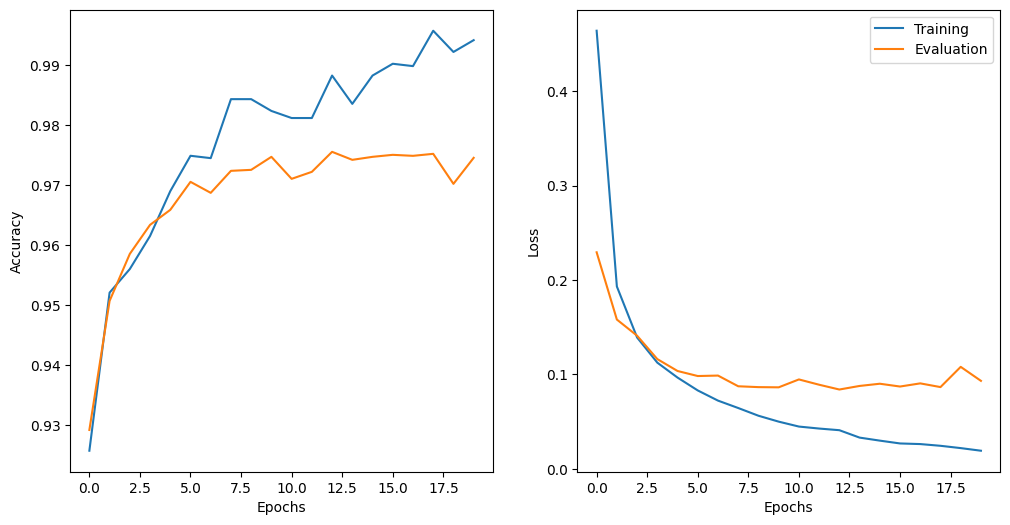

In [73]:
plot_result(
    num_epochs,
    base_metrics["train_accuracy"],
    base_metrics["valid_accuracy"],
    base_metrics["train_loss"],
    base_metrics["valid_loss"]
)

**Now I use Batch Normalization here**

In [75]:
batchnorm_model = nn.Sequential(
    nn.Conv2d(1, 6, 5, stride=2),
    nn.Flatten(),
    nn.Linear(6*12*12, 64),
    nn.BatchNorm1d(64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.BatchNorm1d(32),
    nn.ReLU(),
    nn.Linear(32, 10)
)

In [76]:
summary(base_model, (1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 6, 12, 12]           156
├─Flatten: 1-2                           [-1, 864]                 --
├─Linear: 1-3                            [-1, 64]                  55,360
├─ReLU: 1-4                              [-1, 64]                  --
├─Linear: 1-5                            [-1, 32]                  2,080
├─ReLU: 1-6                              [-1, 32]                  --
├─Linear: 1-7                            [-1, 10]                  330
Total params: 57,926
Trainable params: 57,926
Non-trainable params: 0
Total mult-adds (M): 0.08
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.22
Estimated Total Size (MB): 0.23


Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 6, 12, 12]           156
├─Flatten: 1-2                           [-1, 864]                 --
├─Linear: 1-3                            [-1, 64]                  55,360
├─ReLU: 1-4                              [-1, 64]                  --
├─Linear: 1-5                            [-1, 32]                  2,080
├─ReLU: 1-6                              [-1, 32]                  --
├─Linear: 1-7                            [-1, 10]                  330
Total params: 57,926
Trainable params: 57,926
Non-trainable params: 0
Total mult-adds (M): 0.08
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.22
Estimated Total Size (MB): 0.23

In [77]:
num_classes = len(train_data.dataset.classes)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

batchnorm_model.to(device)

criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(batchnorm_model.parameters())

num_epochs = 20
save_model = './model'
os.makedirs(save_model, exist_ok = True)
model_name = 'batch_norm_model'

batchnorm_model, batchnorm_metrics = train(
    batchnorm_model, model_name, optimizer, criterion, train_dataloader, valid_dataloader, num_epochs, device
)

| epoch   1 |    50/  211 batches | accuracy    0.780
| epoch   1 |   100/  211 batches | accuracy    0.911
| epoch   1 |   150/  211 batches | accuracy    0.932
| epoch   1 |   200/  211 batches | accuracy    0.942
-----------------------------------------------------------
| End of epoch   1 | Time: 12.40s | Train Accuracy    0.952 | Train Loss    0.643 | Valid Accuracy    0.945 | Valid Loss    0.257 
-----------------------------------------------------------
| epoch   2 |    50/  211 batches | accuracy    0.955
| epoch   2 |   100/  211 batches | accuracy    0.959
| epoch   2 |   150/  211 batches | accuracy    0.962
| epoch   2 |   200/  211 batches | accuracy    0.963
-----------------------------------------------------------
| End of epoch   2 | Time: 12.16s | Train Accuracy    0.965 | Train Loss    0.178 | Valid Accuracy    0.963 | Valid Loss    0.144 
-----------------------------------------------------------
| epoch   3 |    50/  211 batches | accuracy    0.971
| epoch   3 

In [78]:
test_acc , test_loss = evaluate_epoch(batchnorm_model, criterion, test_dataloader)
test_acc, test_loss

(0.99685, 0.013315929695121706)

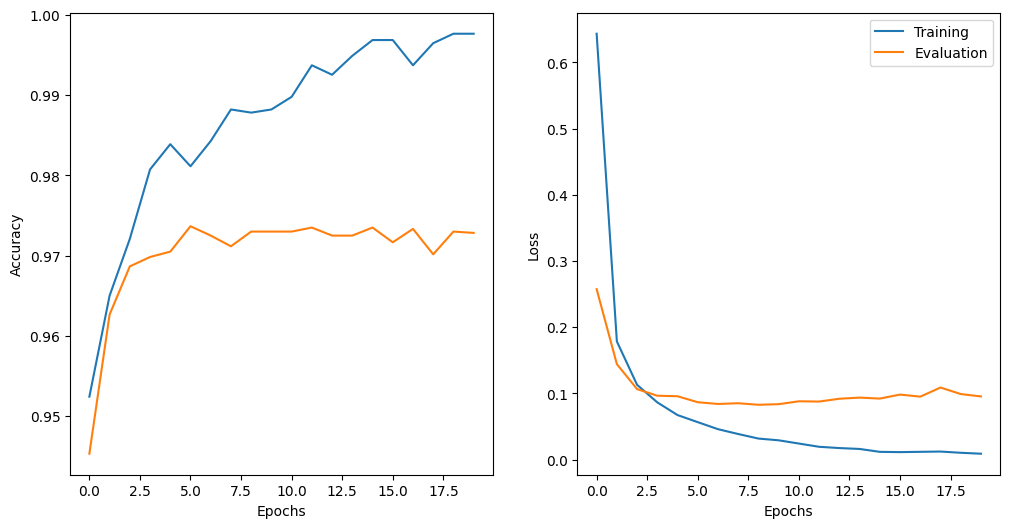

In [79]:
plot_result(
    num_epochs,
    batchnorm_metrics["train_accuracy"],
    batchnorm_metrics["valid_accuracy"],
    batchnorm_metrics["train_loss"],
    batchnorm_metrics["valid_loss"],
)

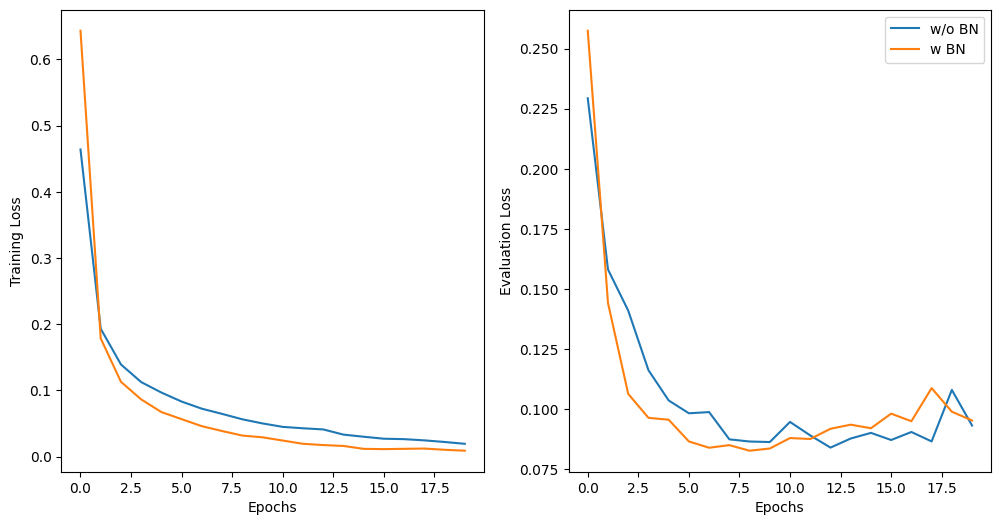

In [80]:
epochs = list(range(num_epochs))
fig, axs = plt.subplots(nrows = 1, ncols =2 , figsize = (12,6))
axs[0].plot(epochs, base_metrics['train_loss'], label = "w/o BN")
axs[0].plot(epochs, batchnorm_metrics['train_loss'], label = "w BN")
axs[1].plot(epochs, base_metrics['valid_loss'], label = "w/o BN")
axs[1].plot(epochs, batchnorm_metrics['valid_loss'], label = "w BN")
axs[0].set_xlabel("Epochs")
axs[1].set_xlabel("Epochs")
axs[0].set_ylabel("Training Loss")
axs[1].set_ylabel("Evaluation Loss")
plt.legend()

**Dropout**

In [81]:
input = torch.randint(5, (3, 3, 2), dtype=torch.float32)

In [82]:
labels = torch.tensor([0, 1, 1])

In [83]:
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(3 * 2, 5),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(5, 2)
)

In [84]:
for p in model.parameters():
    print(p)

Parameter containing:
tensor([[ 0.0862,  0.1255,  0.1914, -0.1122,  0.2687,  0.2505],
        [-0.2292, -0.0367,  0.0587, -0.0133, -0.0506,  0.1638],
        [ 0.3426,  0.0815,  0.2106, -0.0975, -0.3912, -0.0942],
        [ 0.1861, -0.2138,  0.3155, -0.3160, -0.1436,  0.1358],
        [ 0.1845,  0.1984,  0.3845,  0.1273, -0.2820, -0.4068]],
       requires_grad=True)
Parameter containing:
tensor([-0.2871, -0.3873,  0.1763, -0.3309,  0.3732], requires_grad=True)
Parameter containing:
tensor([[ 0.4233,  0.0993,  0.0839,  0.0221,  0.2623],
        [ 0.0106,  0.0040, -0.4072,  0.0208,  0.1270]], requires_grad=True)
Parameter containing:
tensor([-0.0091,  0.0593], requires_grad=True)


In [85]:
predictions = model(input)

In [86]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [87]:
loss = loss_function(predictions, labels)

In [88]:
loss.backward()

In [89]:
optimizer.step()

In [90]:
for p in model.parameters():
    print(p)

Parameter containing:
tensor([[ 0.0852,  0.1265,  0.1904, -0.1132,  0.2697,  0.2495],
        [-0.2292, -0.0367,  0.0587, -0.0133, -0.0506,  0.1638],
        [ 0.3416,  0.0805,  0.2096, -0.0985, -0.3922, -0.0952],
        [ 0.1851, -0.2138,  0.3145, -0.3170, -0.1436,  0.1348],
        [ 0.1835,  0.1974,  0.3855,  0.1263, -0.2810, -0.4078]],
       requires_grad=True)
Parameter containing:
tensor([-0.2881, -0.3873,  0.1753, -0.3319,  0.3722], requires_grad=True)
Parameter containing:
tensor([[ 0.4223,  0.0993,  0.0829,  0.0211,  0.2633],
        [ 0.0116,  0.0040, -0.4062,  0.0218,  0.1260]], requires_grad=True)
Parameter containing:
tensor([-0.0101,  0.0603], requires_grad=True)


**MNIST Classification**

In [91]:
dropout_model = nn.Sequential(
    nn.Conv2d(1, 6, 5, stride=2),
    nn.Flatten(),
    nn.Linear(6 * 12 * 12, 64),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(32, 10)
)

In [92]:
summary(dropout_model, (1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 6, 12, 12]           156
├─Flatten: 1-2                           [-1, 864]                 --
├─Linear: 1-3                            [-1, 64]                  55,360
├─ReLU: 1-4                              [-1, 64]                  --
├─Dropout: 1-5                           [-1, 64]                  --
├─Linear: 1-6                            [-1, 32]                  2,080
├─ReLU: 1-7                              [-1, 32]                  --
├─Dropout: 1-8                           [-1, 32]                  --
├─Linear: 1-9                            [-1, 10]                  330
Total params: 57,926
Trainable params: 57,926
Non-trainable params: 0
Total mult-adds (M): 0.08
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.22
Estimated Total Size (MB): 0.23


Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 6, 12, 12]           156
├─Flatten: 1-2                           [-1, 864]                 --
├─Linear: 1-3                            [-1, 64]                  55,360
├─ReLU: 1-4                              [-1, 64]                  --
├─Dropout: 1-5                           [-1, 64]                  --
├─Linear: 1-6                            [-1, 32]                  2,080
├─ReLU: 1-7                              [-1, 32]                  --
├─Dropout: 1-8                           [-1, 32]                  --
├─Linear: 1-9                            [-1, 10]                  330
Total params: 57,926
Trainable params: 57,926
Non-trainable params: 0
Total mult-adds (M): 0.08
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.22
Estimated Total Size (MB): 0.23

In [93]:
num_classes = len(train_data.dataset.classes)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

dropout_model.to(device)

criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(dropout_model.parameters())

num_epochs = 20
save_model = './model'
os.makedirs(save_model, exist_ok = True)
model_name = 'dropout_model'

dropout_model, dropout_metrics = train(
    dropout_model, model_name, optimizer, criterion, train_dataloader, valid_dataloader, num_epochs, device
)

| epoch   1 |    50/  211 batches | accuracy    0.582
| epoch   1 |   100/  211 batches | accuracy    0.822
| epoch   1 |   150/  211 batches | accuracy    0.866
| epoch   1 |   200/  211 batches | accuracy    0.874
-----------------------------------------------------------
| End of epoch   1 | Time: 12.08s | Train Accuracy    0.887 | Train Loss    0.670 | Valid Accuracy    0.924 | Valid Loss    0.248 
-----------------------------------------------------------
| epoch   2 |    50/  211 batches | accuracy    0.892
| epoch   2 |   100/  211 batches | accuracy    0.902
| epoch   2 |   150/  211 batches | accuracy    0.907
| epoch   2 |   200/  211 batches | accuracy    0.916
-----------------------------------------------------------
| End of epoch   2 | Time: 11.93s | Train Accuracy    0.913 | Train Loss    0.316 | Valid Accuracy    0.943 | Valid Loss    0.185 
-----------------------------------------------------------
| epoch   3 |    50/  211 batches | accuracy    0.923
| epoch   3 

In [94]:
test_acc, test_loss = evaluate_epoch(dropout_model, criterion, test_dataloader)
test_acc, test_loss

(0.9854833333333334, 0.047674556280624995)

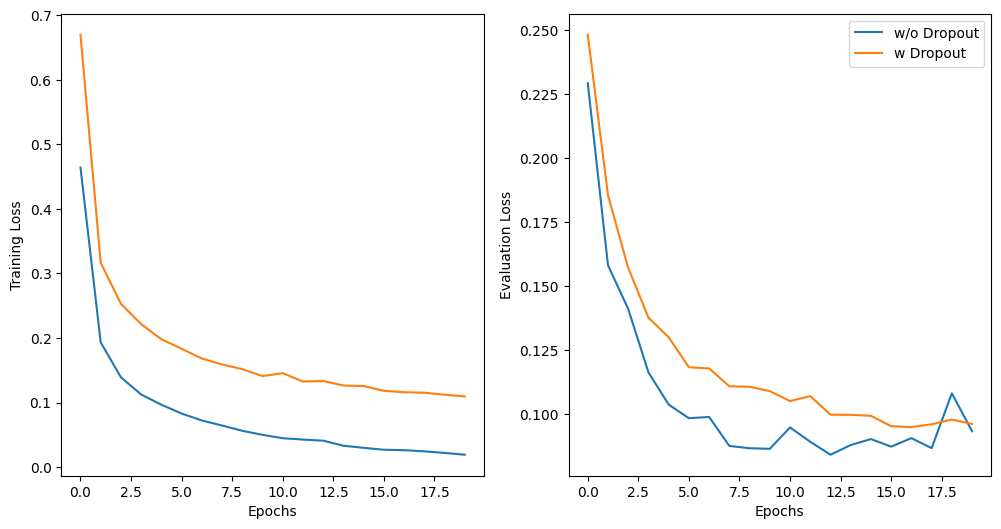

In [95]:
epochs = list(range(num_epochs))
fig, axs = plt.subplots(nrows = 1, ncols =2 , figsize = (12,6))
axs[0].plot(epochs, base_metrics['train_loss'], label = "w/o Dropout")
axs[0].plot(epochs, dropout_metrics['train_loss'], label = "w Dropout")
axs[1].plot(epochs, base_metrics['valid_loss'], label = "w/o Dropout")
axs[1].plot(epochs, dropout_metrics['valid_loss'], label = "w Dropout")
axs[0].set_xlabel("Epochs")
axs[1].set_xlabel("Epochs")
axs[0].set_ylabel("Training Loss")
axs[1].set_ylabel("Evaluation Loss")
plt.legend()

In [96]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [97]:
metrics = []
p_dropouts = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
for p in p_dropouts:
    print(p)
    dropout_model = nn.Sequential(
        nn.Conv2d(1, 6, 5, stride=2),
        nn.Flatten(),
        nn.Linear(6 * 12 * 12, 64),
        nn.ReLU(),
        nn.Dropout(p),
        nn.Linear(64, 32),
        nn.ReLU(),
        nn.Dropout(p),
        nn.Linear(32, 10)
    )

    dropout_model.to(device)

    criterion = torch.nn.CrossEntropyLoss()
    optimizer = optim.Adam(dropout_model.parameters())

    num_epochs = 20
    save_model = './model'
    os.makedirs(save_model, exist_ok = True)
    model_name = 'dropout_model'

    dropout_model, dropout_metrics = train(
        dropout_model, model_name, optimizer, criterion, train_dataloader, valid_dataloader, num_epochs, device
    )
    test_acc, test_loss = evaluate_epoch(dropout_model, criterion, test_dataloader)
    dropout_metrics['test_accuracy'] = test_acc
    dropout_metrics['test_loss'] = test_loss
    metrics.append(dropout_metrics)

0.0
| epoch   1 |    50/  211 batches | accuracy    0.658
| epoch   1 |   100/  211 batches | accuracy    0.888
| epoch   1 |   150/  211 batches | accuracy    0.912
| epoch   1 |   200/  211 batches | accuracy    0.926
-----------------------------------------------------------
| End of epoch   1 | Time: 12.67s | Train Accuracy    0.934 | Train Loss    0.494 | Valid Accuracy    0.934 | Valid Loss    0.220 
-----------------------------------------------------------
| epoch   2 |    50/  211 batches | accuracy    0.936
| epoch   2 |   100/  211 batches | accuracy    0.940
| epoch   2 |   150/  211 batches | accuracy    0.945
| epoch   2 |   200/  211 batches | accuracy    0.956
-----------------------------------------------------------
| End of epoch   2 | Time: 11.95s | Train Accuracy    0.957 | Train Loss    0.188 | Valid Accuracy    0.950 | Valid Loss    0.163 
-----------------------------------------------------------
| epoch   3 |    50/  211 batches | accuracy    0.953
| epoch 

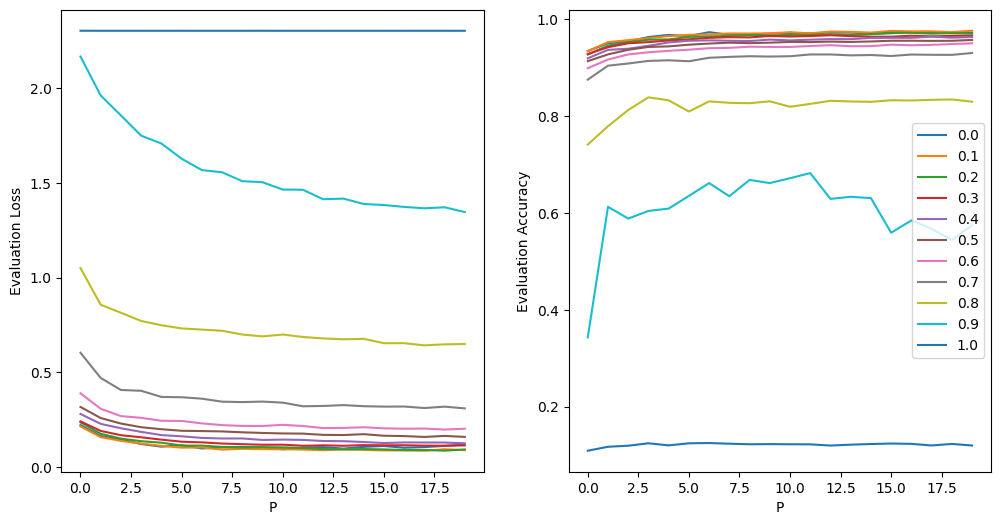

In [98]:
epochs = list(range(num_epochs))
fig, axs = plt.subplots(nrows = 1, ncols =2 , figsize = (12,6))

for idx, metric in enumerate(metrics):
    axs[0].plot(epochs, metric['valid_loss'], label=p_dropouts[idx])
    axs[1].plot(epochs, metric['valid_accuracy'], label=p_dropouts[idx])
axs[0].set_xlabel("P")
axs[1].set_xlabel("P")
axs[0].set_ylabel("Evaluation Loss")
axs[1].set_ylabel("Evaluation Accuracy")
plt.legend()

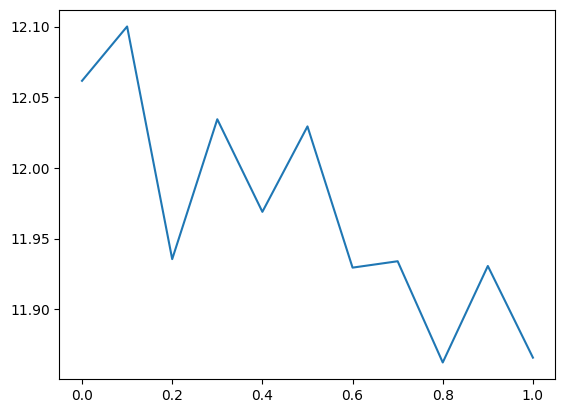

In [99]:
plt.plot(p_dropouts, [sum(metric['time'])/len(metric['time']) for metric in metrics])
plt.show()

**Skip Connection**

In [100]:
import numpy as np
np.random.seed(seed=941)
SEED = 1
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

x = np.random.randint(low=0, high=255, size=(3, 3)).astype(np.float64)
x = torch.tensor(x, dtype=torch.float32).unsqueeze(0).unsqueeze(0)

In [101]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SimpleResBlock(nn.Module):
    def __init__(self, in_channels):
        super(SimpleResBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, in_channels, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(in_channels)
        self.conv2 = nn.Conv2d(in_channels, in_channels, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(in_channels)

    def forward(self, x):
        identity = x
        print('1', identity)
        out = self.conv1(x)
        print('2', out)
        out = self.bn1(out)
        print('3', out)
        out = F.relu(out)
        print('4', out)
        out = self.conv2(out)
        print('5', out)
        out = self.bn2(out)
        print('6', out)
        out += identity
        print('7', out)
        out = F.relu(out)

        return out

In [102]:
in_channels = 1
skip_connection_model = SimpleResBlock(in_channels)

skip_connection_model(x)

1 tensor([[[[ 72., 106., 128.],
          [242.,  26., 108.],
          [208., 213.,  54.]]]])
2 tensor([[[[ 40.7982,  -3.6336,  -7.0926],
          [-43.0856,  64.1113, -35.9400],
          [-60.0185,   7.2153,   4.9145]]]], grad_fn=<ConvolutionBackward0>)
3 tensor([[[[ 1.1901e+00,  8.5362e-05, -9.2560e-02],
          [-1.0566e+00,  1.8146e+00, -8.6521e-01],
          [-1.5101e+00,  2.9066e-01,  2.2904e-01]]]],
       grad_fn=<NativeBatchNormBackward0>)
4 tensor([[[[1.1901e+00, 8.5362e-05, 0.0000e+00],
          [0.0000e+00, 1.8146e+00, 0.0000e+00],
          [0.0000e+00, 2.9066e-01, 2.2904e-01]]]], grad_fn=<ReluBackward0>)
5 tensor([[[[ 0.6035, -0.0533,  0.1914],
          [ 0.1536,  0.2360, -0.1182],
          [ 0.3159,  0.1196,  0.2282]]]], grad_fn=<ConvolutionBackward0>)
6 tensor([[[[ 2.1131, -1.2134,  0.0258],
          [-0.1658,  0.2518, -1.5423],
          [ 0.6564, -0.3376,  0.2120]]]], grad_fn=<NativeBatchNormBackward0>)
7 tensor([[[[ 74.1131, 104.7866, 128.0258],
          [

tensor([[[[ 74.1131, 104.7866, 128.0258],
          [241.8342,  26.2518, 106.4577],
          [208.6564, 212.6624,  54.2120]]]], grad_fn=<ReluBackward0>)

**MNIST Classification**

In [103]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SimpleBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(SimpleBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(out_channels)

    def forward(self, x):
        identity = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = F.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        out += identity

        out = F.relu(out)

        return out

class SimpleNet(nn.Module):
    def __init__(self, in_channels, num_classes, num_blocks, block_channels):
        super(SimpleNet, self).__init__()
        layers = []
        for i in range(num_blocks):
            layers.append(SimpleBlock(in_channels if i == 0 else block_channels, block_channels))
        self.blocks = nn.Sequential(*layers)
        self.fc = nn.Linear(block_channels, num_classes)  # Fully connected layer

    def forward(self, x):
        out = self.blocks(x)

        # Flattening and fully connected layer
        out = F.adaptive_avg_pool2d(out, (1, 1))  # Adaptive pooling to size (1, 1)
        out = torch.flatten(out, 1)  # Flatten the tensor
        out = self.fc(out)  # Fully connected layer

        return out

In [104]:
in_channels = 1
skip_connection_model = SimpleNet(in_channels, num_classes=len(train_data.dataset.classes), num_blocks=4, block_channels=32)

In [105]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
skip_connection_model = skip_connection_model.to(device)

In [106]:
summary(skip_connection_model, (1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 32, 28, 28]          --
|    └─SimpleBlock: 2-1                  [-1, 32, 28, 28]          --
|    |    └─Conv2d: 3-1                  [-1, 32, 28, 28]          320
|    |    └─BatchNorm2d: 3-2             [-1, 32, 28, 28]          64
|    |    └─Conv2d: 3-3                  [-1, 32, 28, 28]          9,248
|    |    └─BatchNorm2d: 3-4             [-1, 32, 28, 28]          64
|    └─SimpleBlock: 2-2                  [-1, 32, 28, 28]          --
|    |    └─Conv2d: 3-5                  [-1, 32, 28, 28]          9,248
|    |    └─BatchNorm2d: 3-6             [-1, 32, 28, 28]          64
|    |    └─Conv2d: 3-7                  [-1, 32, 28, 28]          9,248
|    |    └─BatchNorm2d: 3-8             [-1, 32, 28, 28]          64
|    └─SimpleBlock: 2-3                  [-1, 32, 28, 28]          --
|    |    └─Conv2d: 3-9                  [-1, 32, 28, 28]          9,248
| 

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 32, 28, 28]          --
|    └─SimpleBlock: 2-1                  [-1, 32, 28, 28]          --
|    |    └─Conv2d: 3-1                  [-1, 32, 28, 28]          320
|    |    └─BatchNorm2d: 3-2             [-1, 32, 28, 28]          64
|    |    └─Conv2d: 3-3                  [-1, 32, 28, 28]          9,248
|    |    └─BatchNorm2d: 3-4             [-1, 32, 28, 28]          64
|    └─SimpleBlock: 2-2                  [-1, 32, 28, 28]          --
|    |    └─Conv2d: 3-5                  [-1, 32, 28, 28]          9,248
|    |    └─BatchNorm2d: 3-6             [-1, 32, 28, 28]          64
|    |    └─Conv2d: 3-7                  [-1, 32, 28, 28]          9,248
|    |    └─BatchNorm2d: 3-8             [-1, 32, 28, 28]          64
|    └─SimpleBlock: 2-3                  [-1, 32, 28, 28]          --
|    |    └─Conv2d: 3-9                  [-1, 32, 28, 28]          9,248
| 

In [107]:
num_classes = len(train_data.dataset.classes)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

skip_connection_model.to(device)

criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(skip_connection_model.parameters())

num_epochs = 20
save_model = './model'
os.makedirs(save_model, exist_ok = True)
model_name = 'skip_connection_model'

skip_connection_model, base_metrics = train(
    skip_connection_model, model_name, optimizer, criterion, train_dataloader, valid_dataloader, num_epochs, device
)

| epoch   1 |    50/  211 batches | accuracy    0.366
| epoch   1 |   100/  211 batches | accuracy    0.810
| epoch   1 |   150/  211 batches | accuracy    0.928
| epoch   1 |   200/  211 batches | accuracy    0.956
-----------------------------------------------------------
| End of epoch   1 | Time: 21.70s | Train Accuracy    0.957 | Train Loss    1.007 | Valid Accuracy    0.926 | Valid Loss    0.411 
-----------------------------------------------------------
| epoch   2 |    50/  211 batches | accuracy    0.966
| epoch   2 |   100/  211 batches | accuracy    0.969
| epoch   2 |   150/  211 batches | accuracy    0.970
| epoch   2 |   200/  211 batches | accuracy    0.976
-----------------------------------------------------------
| End of epoch   2 | Time: 21.23s | Train Accuracy    0.977 | Train Loss    0.178 | Valid Accuracy    0.962 | Valid Loss    0.168 
-----------------------------------------------------------
| epoch   3 |    50/  211 batches | accuracy    0.981
| epoch   3 

In [108]:
test_acc, test_loss = evaluate_epoch(skip_connection_model, criterion, test_dataloader)
test_acc, test_loss

(0.983, 0.051784928644353405)

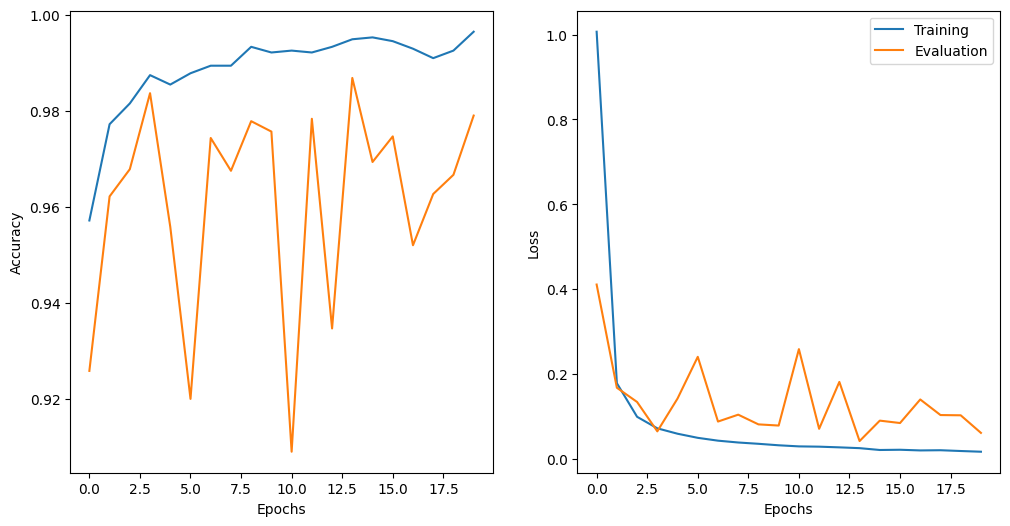

In [109]:
plot_result(
    num_epochs,
    base_metrics["train_accuracy"],
    base_metrics["valid_accuracy"],
    base_metrics["train_loss"],
    base_metrics["valid_loss"]
)